<a href="https://colab.research.google.com/github/seohyun126/24Analysis_BASE/blob/week6/EfficientNet_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.1 MB/s eta 0:00:00
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16424 sha256=892365aeeefff618001621504c14d568e498aed551c4b150e

In [3]:
#!pip install efficientnet_pytorch

import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from efficientnet_pytorch import EfficientNet
from PIL import Image
import json
import requests
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')

Mounted at /content/drive


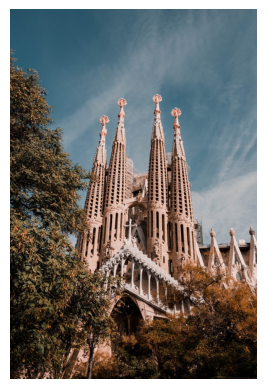

In [5]:
image_path = "/content/drive/MyDrive/efficientnet_발제/efficientnet_발제/imgs/"
image = Image.open(image_path+"01.jpg")
plt.imshow(image)
plt.axis("off")  # 축 제거
plt.show()

## **EfficientNet b0**

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 136MB/s]


Loaded pretrained weights for efficientnet-b0
palace: 36.16%
castle: 24.67%
church: 8.73%
bell_cote: 7.13%
monastery: 2.25%


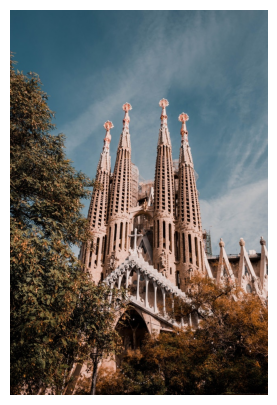

In [6]:
#ImageNet 클래스 매핑
imagenet_json_path = "/content/drive/MyDrive/efficientnet_발제/efficientnet_발제/imagenet.json"

with open(imagenet_json_path, "r") as f:
    imagenet_classes = json.load(f)

#모델 로드
model = EfficientNet.from_pretrained('efficientnet-b0')
model.eval()


def preprocess_image(image_path, image_size):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  #사이즈 맞게 정리
    ])

    image = Image.open(image_path).convert('RGB')  #PIL 이미지로 변환
    image = transform(image)
    image = image.unsqueeze(0)  #배치 차원 수정

    return image

#추론 함수
def inference(model, image_path):
    image_size = model._conv_stem.weight.shape[2]
    input_tensor = preprocess_image(image_path, image_size)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    input_tensor = input_tensor.to(device)

    # 추론 수행
    with torch.no_grad():
        output = model(input_tensor)

    # 결과 해석
    probabilities = torch.nn.functional.softmax(output[0], dim=0)  # 소프트맥스 적용
    top5_prob, top5_catid = torch.topk(probabilities, 5)  # 상위 5개 클래스 추출

    for i in range(5):
        class_idx = str(top5_catid[i].item())
        class_name = imagenet_classes[class_idx][1]
        print(f"{class_name}: {top5_prob[i].item() * 100:.2f}%")

    # 원본 이미지 출력
    image = Image.open(image_path)
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# 실행
inference(model, image_path+"01.jpg")


breakwater: 56.29%
lakeside: 4.80%
maze: 3.65%
seashore: 2.23%
patio: 1.52%


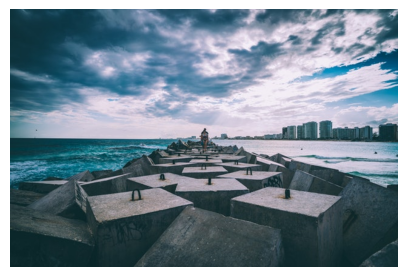

In [7]:
inference(model, image_path+"05.jpg")

## **EfficientNet b7**

In [8]:
model = EfficientNet.from_pretrained('efficientnet-b7')
model.eval()

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b7-dcc49843.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b7-dcc49843.pth
100%|██████████| 254M/254M [00:01<00:00, 161MB/s]


Loaded pretrained weights for efficientnet-b7


EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 64, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        64, 64, kernel_size=(3, 3), stride=[1, 1], groups=64, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        64, 16, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        16, 64, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False
  

church: 58.05%
palace: 18.72%
castle: 8.39%
bell_cote: 3.78%
monastery: 2.00%


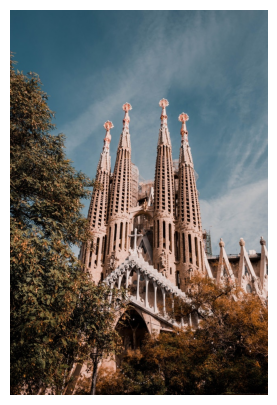

In [19]:
inference(model, image_path+"01.jpg")

beacon: 84.28%
breakwater: 5.56%
schooner: 0.26%
picket_fence: 0.18%
promontory: 0.16%


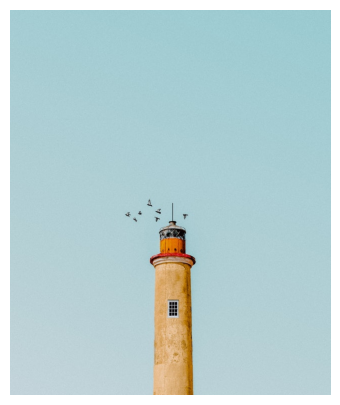

In [20]:
inference(model, image_path+"04.jpg")

breakwater: 79.23%
maze: 6.20%
seashore: 0.45%
promontory: 0.41%
beacon: 0.35%


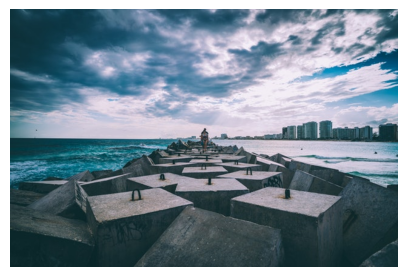

In [21]:
inference(model, image_path+"05.jpg")

cocker_spaniel: 36.04%
English_setter: 13.61%
cheetah: 7.28%
studio_couch: 6.29%
Maltese_dog: 2.71%


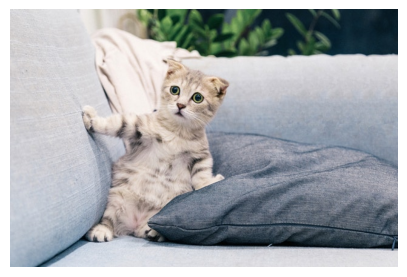

In [11]:
inference(model, image_path+"cat.jpg")

## **EfficientNet b1**

In [23]:
model = EfficientNet.from_pretrained('efficientnet-b1')
model.eval()

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b1-f1951068.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b1-f1951068.pth
100%|██████████| 30.1M/30.1M [00:00<00:00, 171MB/s]


Loaded pretrained weights for efficientnet-b1


EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False
    

palace: 64.25%
castle: 16.62%
bell_cote: 7.39%
church: 2.95%
monastery: 0.46%


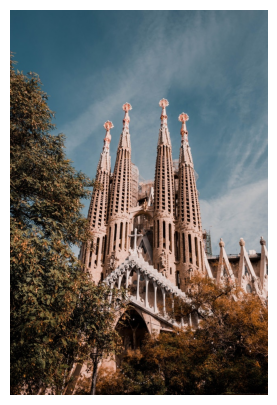

In [25]:
inference(model, image_path+"01.jpg")

beacon: 82.37%
breakwater: 4.87%
mosque: 0.49%
water_tower: 0.42%
bell_cote: 0.35%


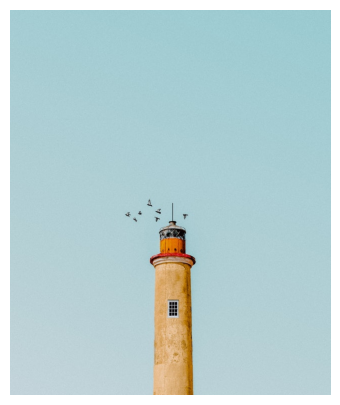

In [27]:
inference(model, image_path+"04.jpg")

breakwater: 69.26%
beacon: 3.78%
aircraft_carrier: 2.13%
lakeside: 1.25%
seashore: 1.11%


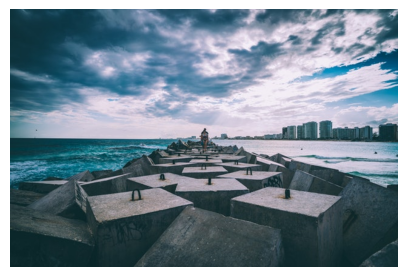

In [28]:
inference(model, image_path+"05.jpg")

Egyptian_cat: 25.87%
lynx: 17.38%
tiger_cat: 5.19%
studio_couch: 4.88%
tabby: 3.44%


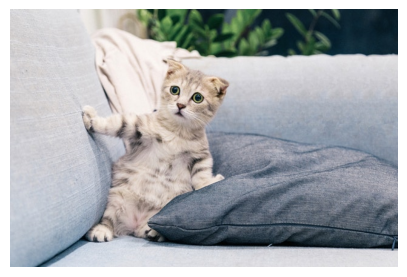

In [29]:
inference(model, image_path+"cat.jpg")

## **EfficientNet b2**

In [36]:
model = EfficientNet.from_pretrained('efficientnet-b2')
model.eval()

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b2-8bb594d6.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b2-8bb594d6.pth
100%|██████████| 35.1M/35.1M [00:00<00:00, 109MB/s]


Loaded pretrained weights for efficientnet-b2


EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False
    

castle: 17.55%
bell_cote: 12.51%
church: 11.78%
palace: 7.99%
organ: 4.46%


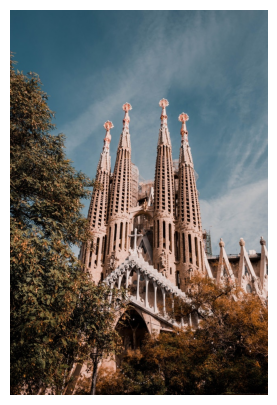

In [37]:
inference(model, image_path+"01.jpg")

beacon: 59.32%
breakwater: 7.97%
mosque: 0.85%
bell_cote: 0.76%
promontory: 0.44%


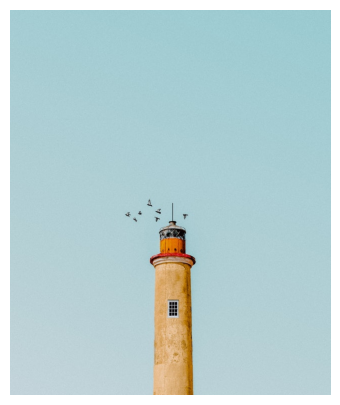

In [38]:
inference(model, image_path+"04.jpg")

breakwater: 55.58%
maze: 20.58%
fountain: 4.90%
lakeside: 2.05%
seashore: 1.57%


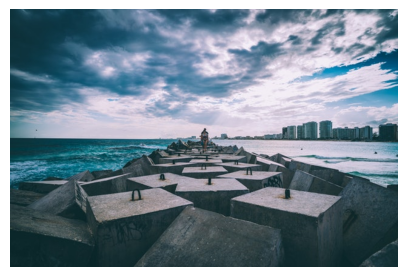

In [39]:
inference(model, image_path+"05.jpg")

Egyptian_cat: 8.04%
cheetah: 7.97%
tiger_cat: 7.41%
Norfolk_terrier: 7.27%
toy_poodle: 5.20%


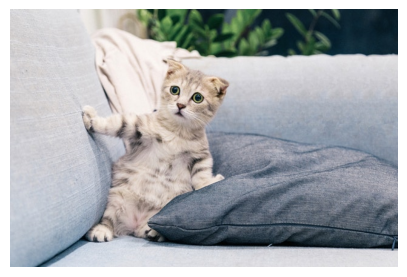

In [40]:
inference(model, image_path+"cat.jpg")